<img src="https://github.com/djp840/MSDS_422_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS422 Assignment 02:

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### Data Dictionary Housing Values in Suburbs of Boston

The Boston data frame has 506 rows and 14 columns.<br>
The <b>medv variable</b> is the target variable.<br>
<br>
<b>crim</b><br>
per capita crime rate by town.<br>
<br>
<b>zn</b><br>
proportion of residential land zoned for lots over 25,000 sq.ft.<br>
<br>
<b>inducrims</b><br>
proportion of non-retail business acres per town.<br>
<br>
<b>chas</b><br>
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br>
<br>
<b>nox</b><br>
nitrogen oxides concentration (parts per 10 million).<br>
<br>
<b>rm</b><br>
average number of rooms per dwelling.<br>
<br>
<b>age</b><br>
proportion of owner-occupied units built prior to 1940.<br>
<br>
<b>dis</b><br>
weighted mean of distances to five Boston employment centres.<br>
<br>
<b>rad</b><br>
index of accessibility to radial highways.<br>
<br>
<b>tax</b><br>
full-value property minus tax rate per ten thousand dollars<br>
<br>
<b>ptratio</b><br>
pupil-teacher ratio by town.<br>
<br>
<b>black</b><br>
1 Thousand(Bk - 0.63)^2" where Bk is the proportion of blacks by town.<br>
<br>
<b>lstat</b><br>
lower status of the population (percent).<br>
<br>
<b>medv</b><br>
median value of owner-occupied homes in $1000s.<br>
<br>
<br>
<b>Sources:</b><br>
Harrison, D. and Rubinfeld, D.L. 1978 Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.<br>
<br>
Belsley D.A., Kuh, E. and Welsch, R.E. 1980 Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.<br>

## Import packages 

In [2]:
import numpy as np
import pandas as pd
import os
import itertools
from math import sqrt
from scipy import stats as st
import cvxopt

import sklearn 
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.model_selection import train_test_split

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import make_scorer, accuracy_score 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import statsmodels.api as sm

from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [3]:
%matplotlib inline

<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Load Data (Local Directory)

In [5]:
boston_df=pd.read_csv('./data/MSDS422_boston.csv')

### Mount Google Drive to Colab Enviorment

In [6]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Data Quality Review 

In [7]:
print("Shape:", boston_df.shape,"\n")
print("Variable Types:") 
print(boston_df.dtypes)

Shape: (506, 14) 

Variable Types:
neighborhood     object
crim            float64
zn              float64
indus           float64
chas              int64
nox             float64
rooms           float64
age             float64
dis             float64
rad               int64
tax               int64
ptratio         float64
lstat           float64
mv              float64
dtype: object


In [8]:
boston_df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


 <div class="alert alert-block alert-warning">
Dropping Neighborhood as it is non-numeric
 </div>

In [9]:
boston_df=boston_df.drop('neighborhood', 1)

## Exploritory Data Analysis (EDA) 

### Review Dataset for Missing Values

In [10]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row for each column number of records
</div> 

In [11]:
boston_df.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Review Dataset Distributions  Boxplot and Histograms

<AxesSubplot:>

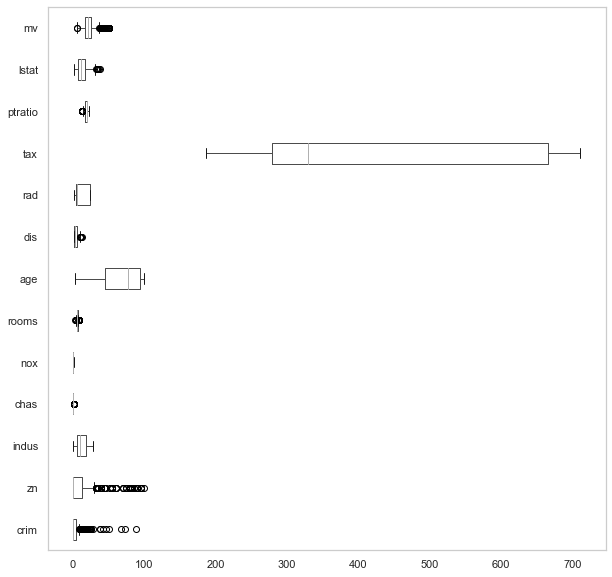

In [12]:
boston_df.boxplot(vert=False, figsize=(10,10), grid=False)

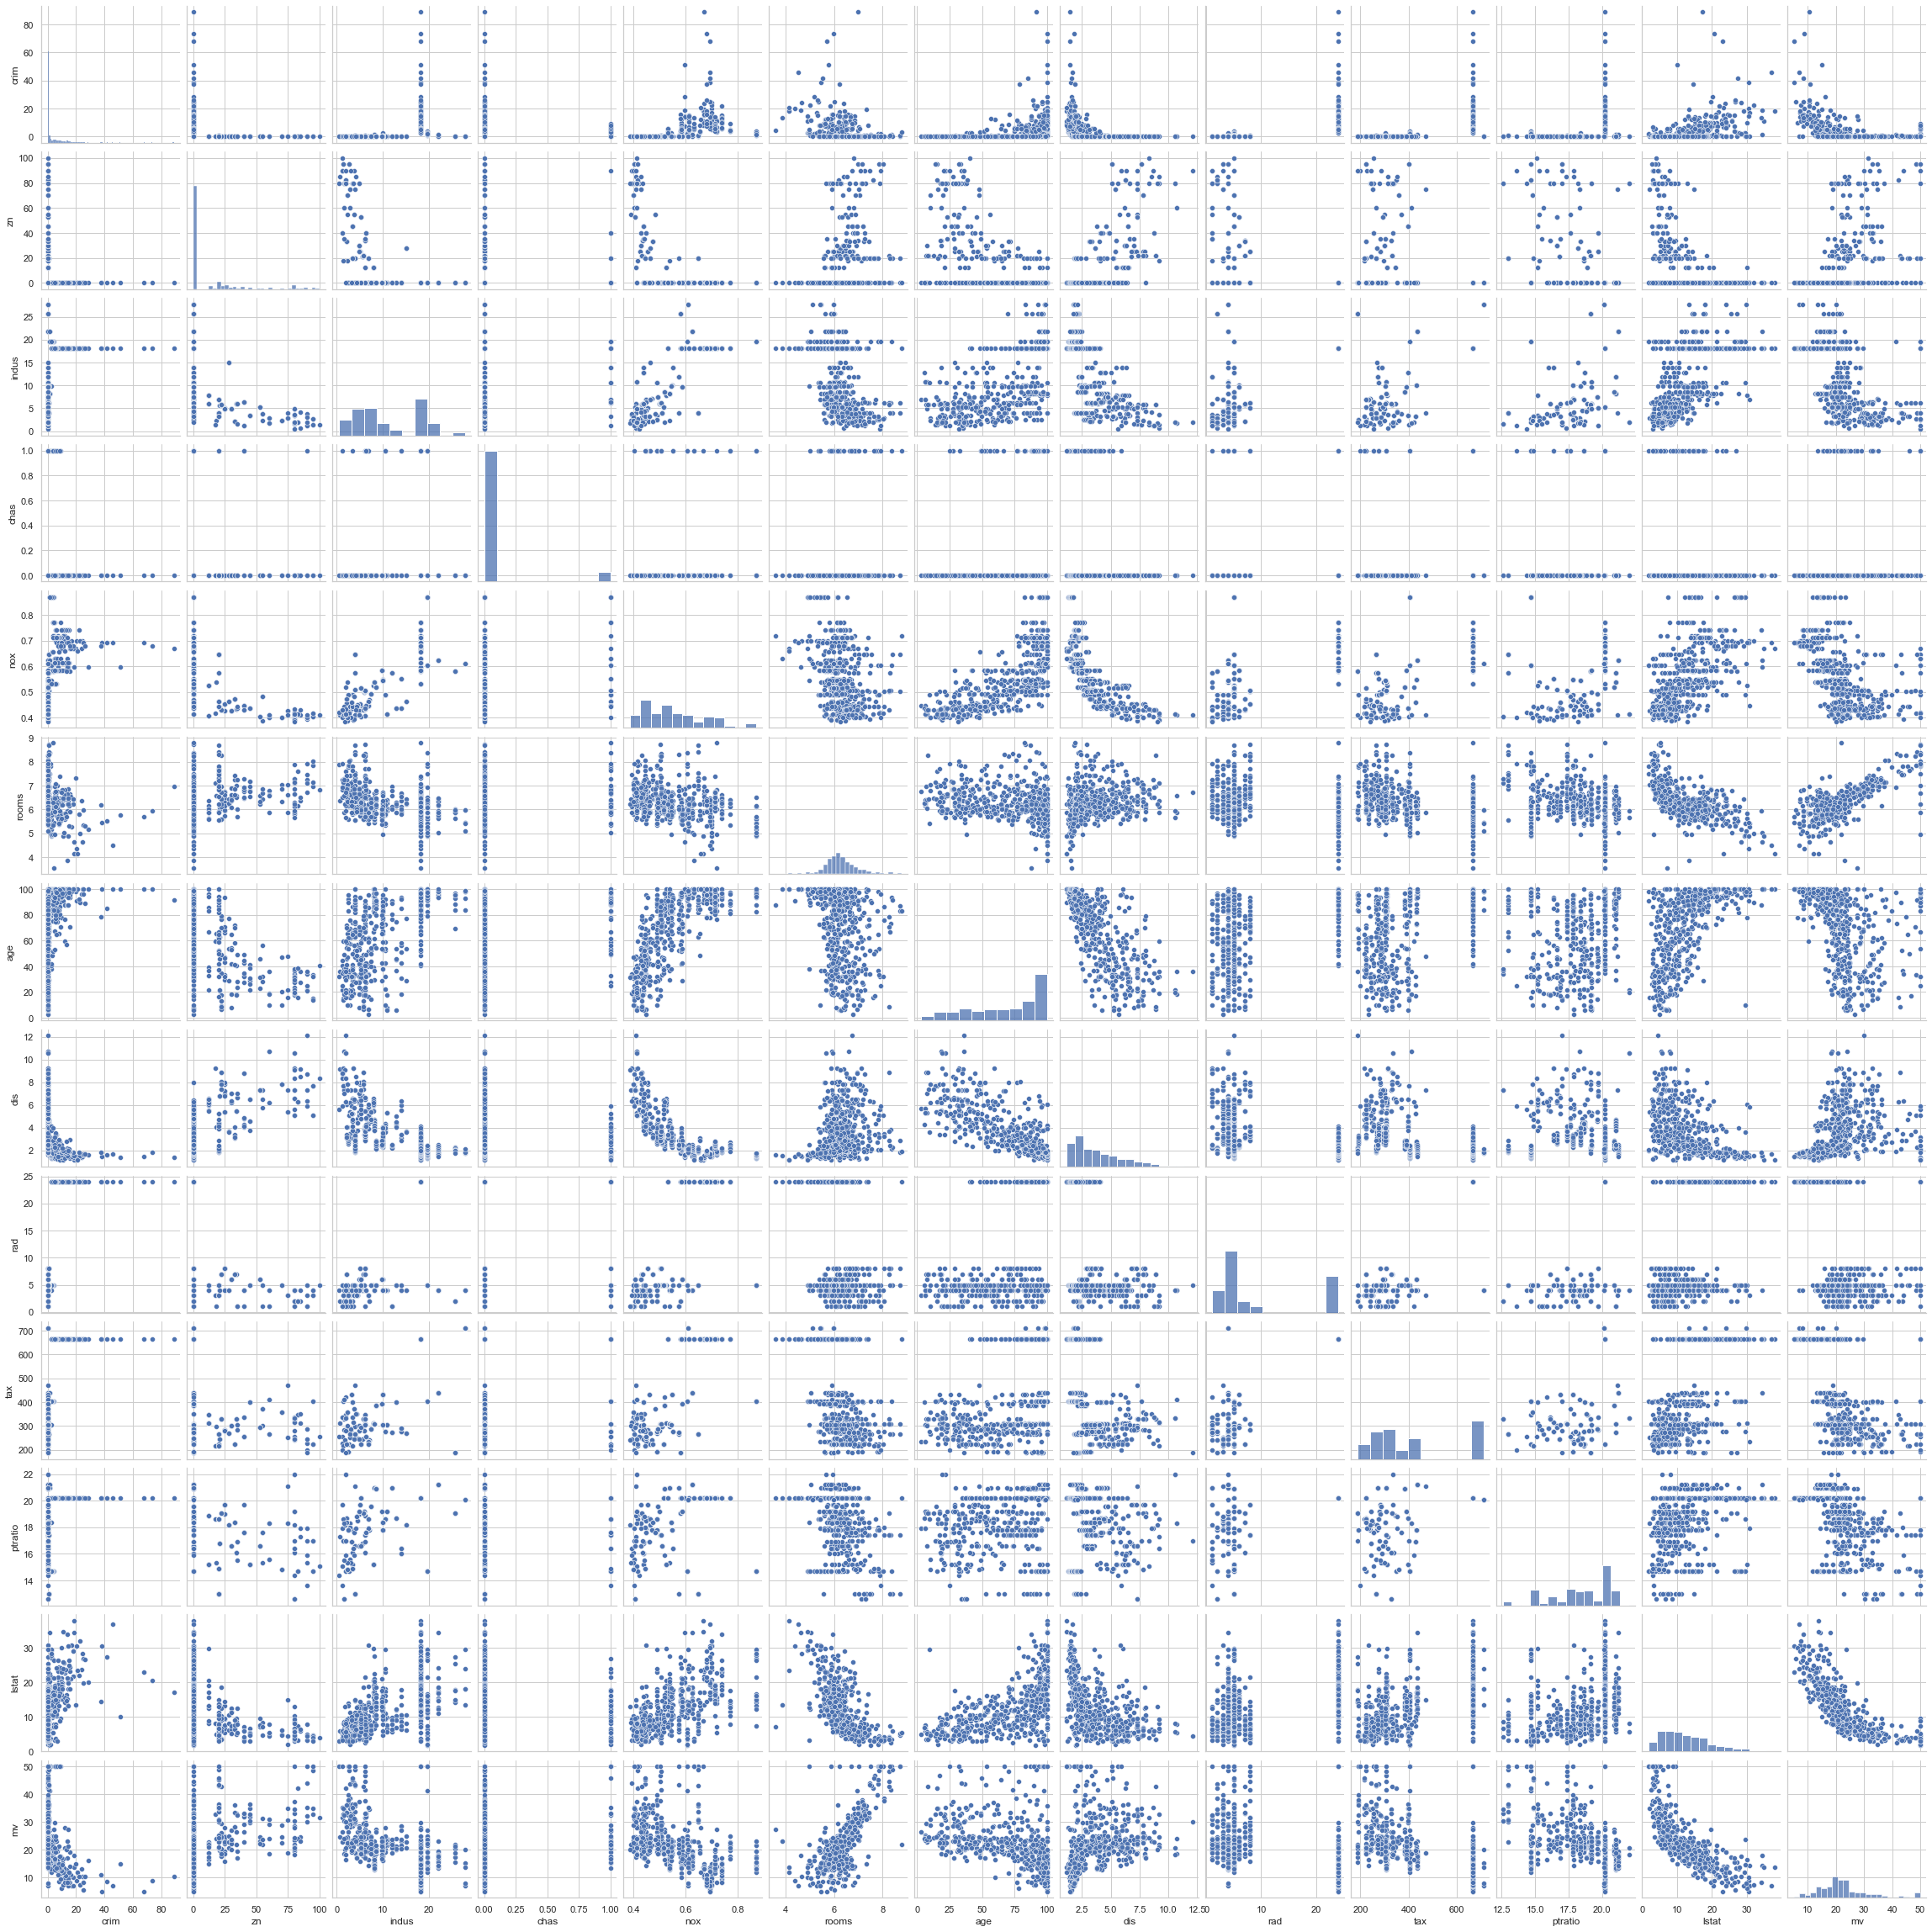

In [13]:
sns.pairplot(boston_df, diag_kind='hist')

## Preprocess Data for Analysis

#### Normalizing Variable Distributions with Log Transformation 

Analysis of linear relationships between variables can introduce "0" (zero) values, these have to be removed to be able to work with Log transformation (normalization) of the data

<div class="alert alert-block alert-info">
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
    </div>

y = (x**lmbda - 1) / lmbda,  for lmbda > 0<br>
    log(x),                  for lmbda = 0<br>

<b>boxcox</b> requires the input data to be positive. Sometimes a Box-Cox transformation provides a `shift parameter` to achieve this;<br> <b>boxcox</b> does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.

#### Create Dataframe with Target Variable

In [14]:
boston_df1=boston_df.copy()

In [15]:
columns = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
boston_Target = boston_df1.drop(columns=columns)

In [16]:
print(boston_Target.head())

     mv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [17]:
boston_Target.shape

(506, 1)

In [18]:
boston_df2=boston_df.apply(lambda x: x+.01)
boston_df2=boston_df2.transform(lambda x: st.boxcox(x)[0])

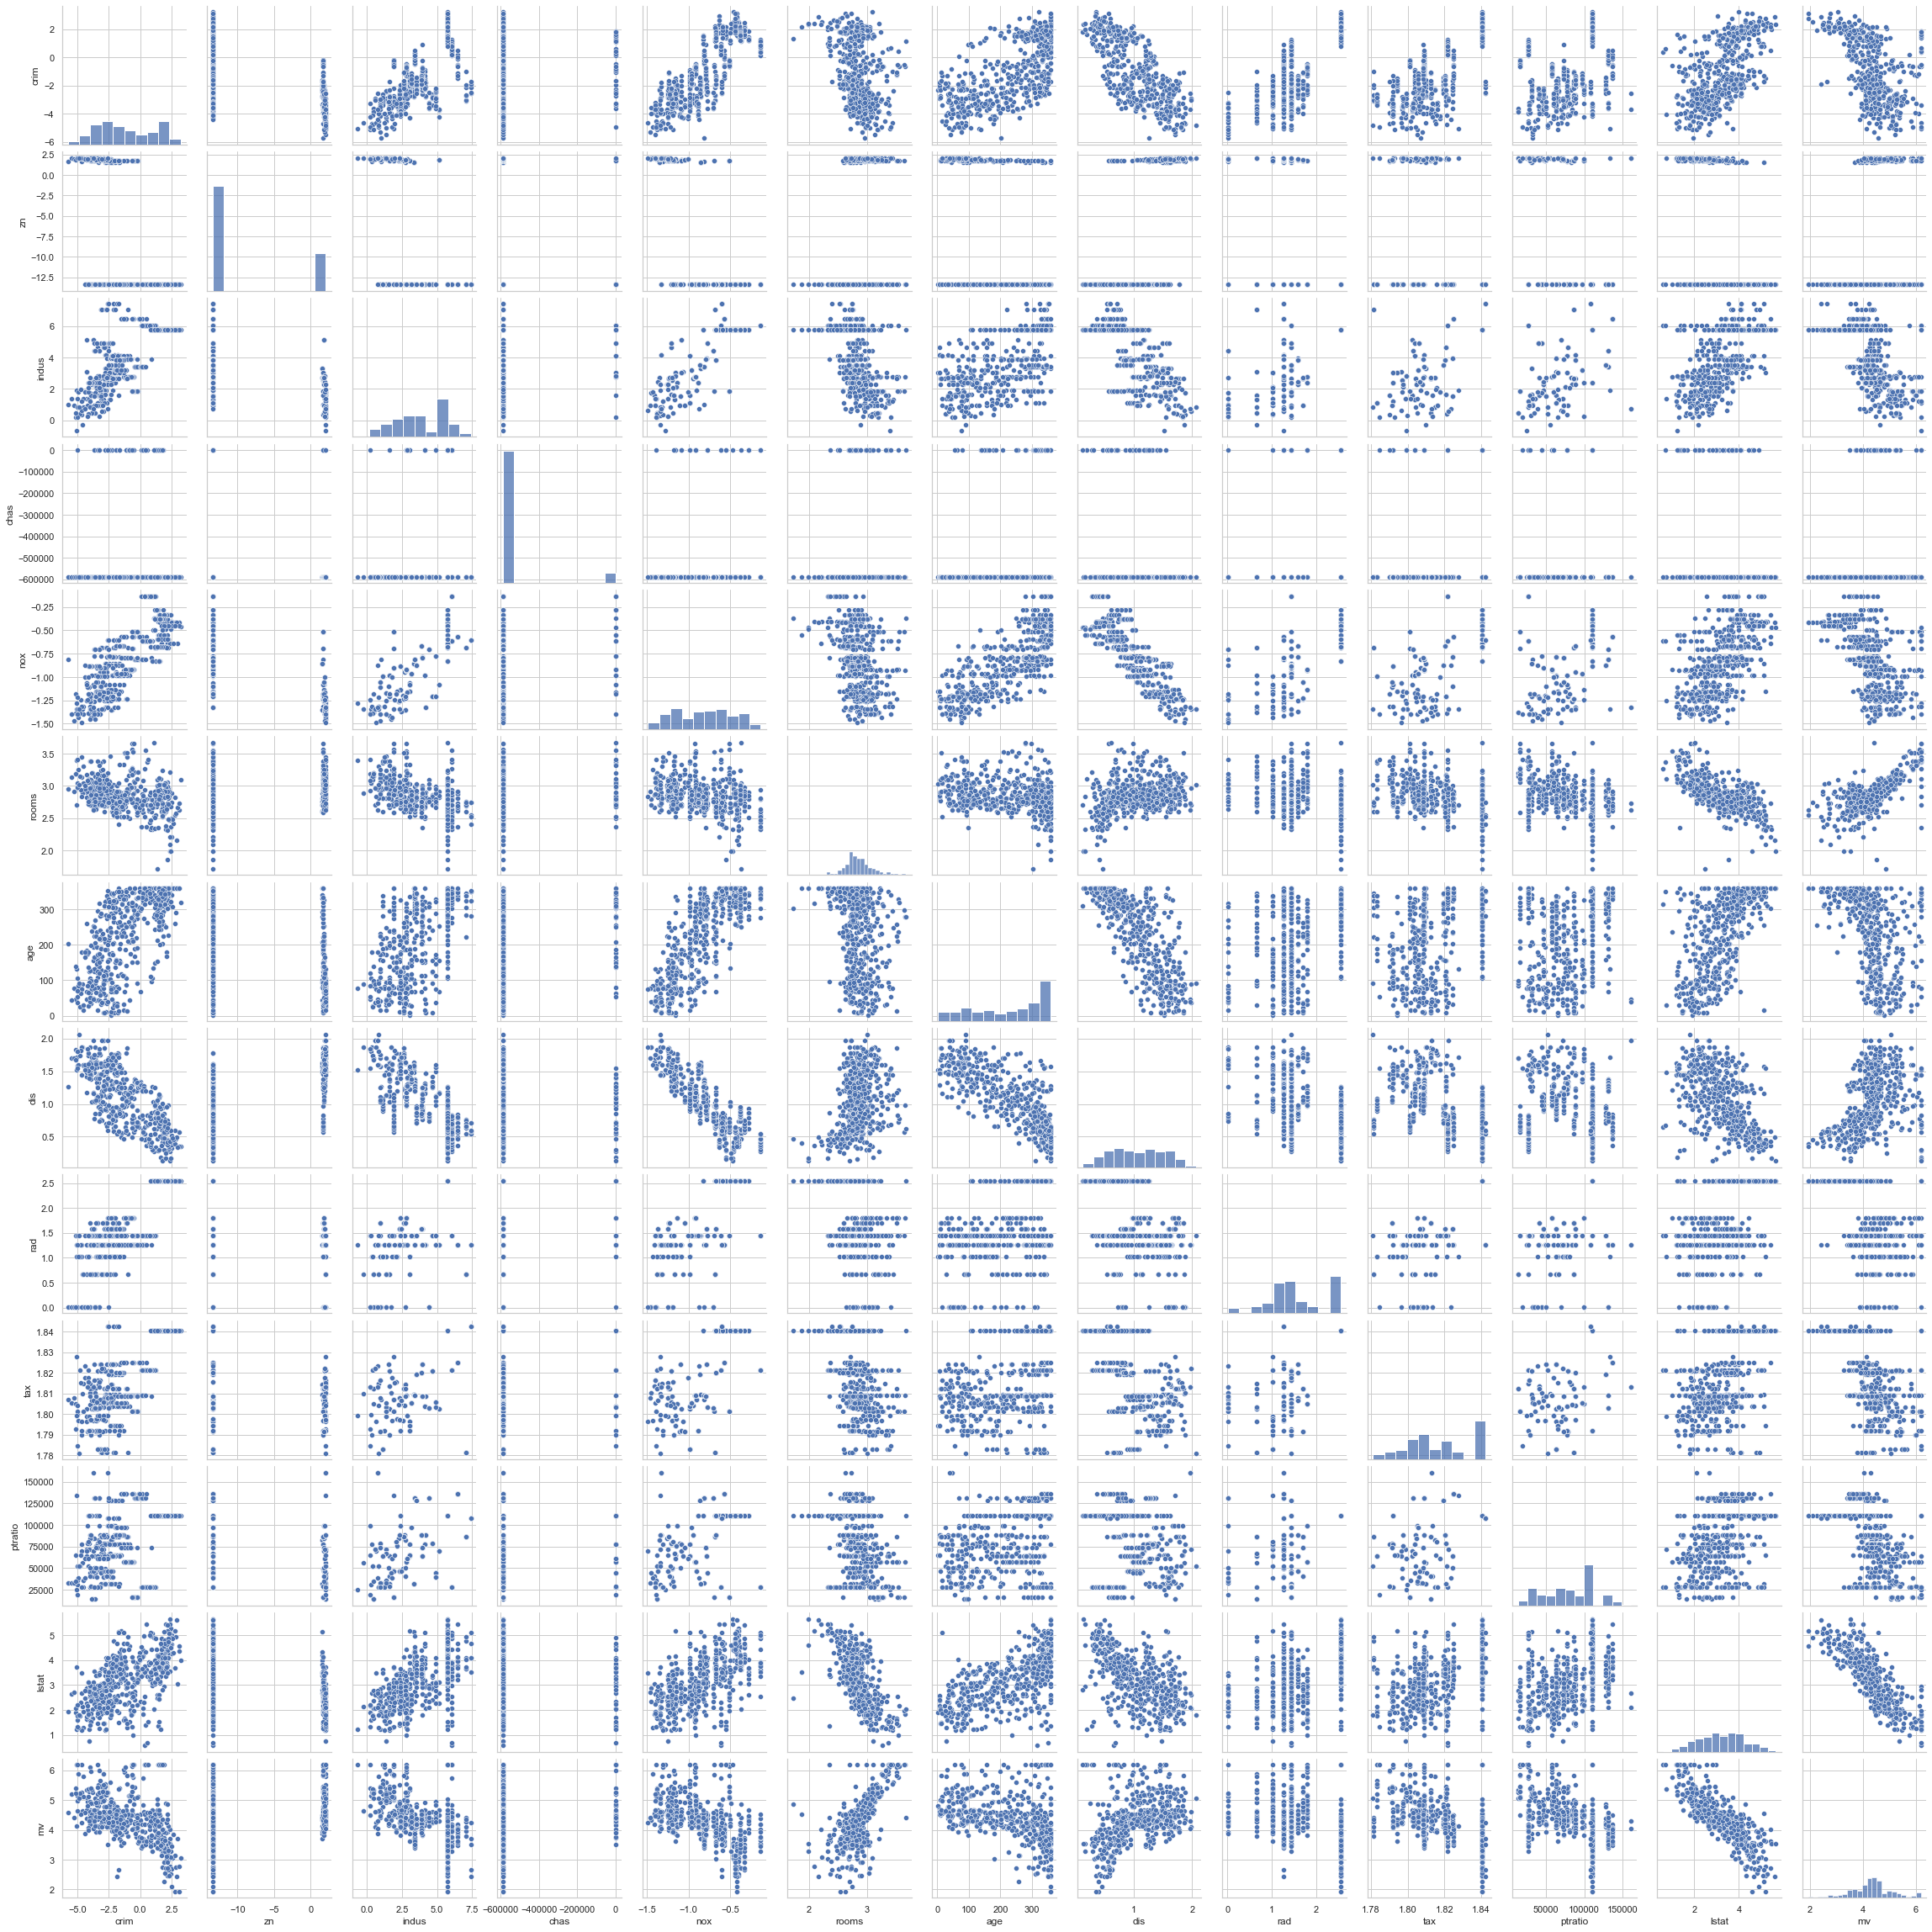

In [19]:
sns.pairplot(boston_df2, diag_kind='hist')

In [20]:
boston_df3=boston_df2.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'mv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

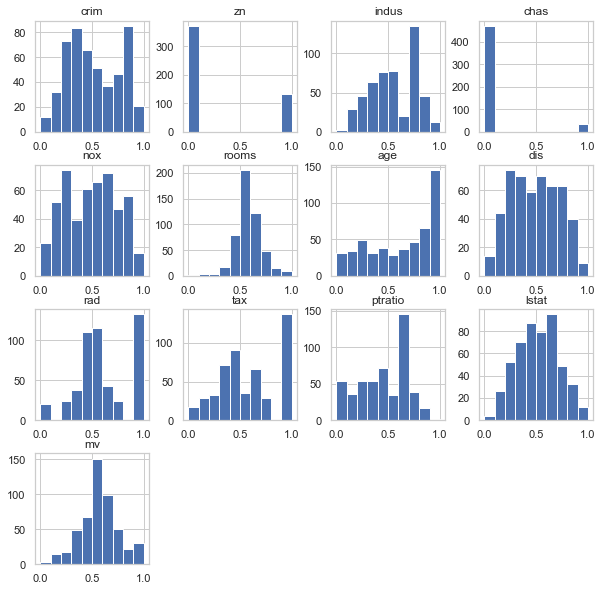

In [21]:
boston_df3.hist(figsize=(10,10))

#### Plot the distribution of the target variable mv (median value of owner-occupied homes in $1000s)

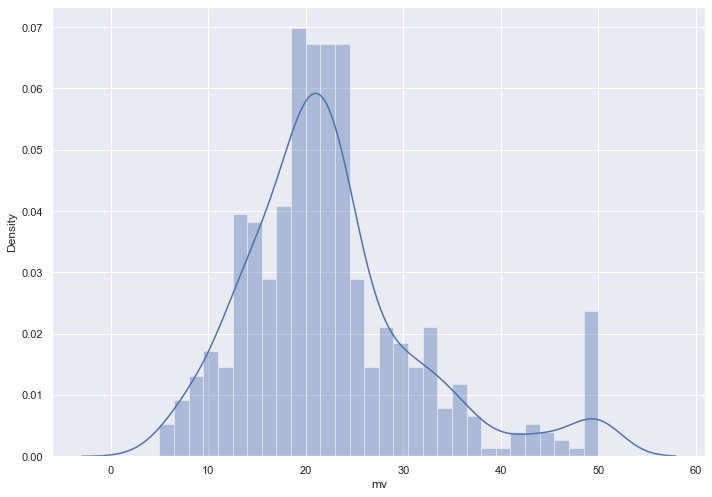

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_Target['mv'], bins=30)
plt.show()

In [23]:
boston_df3.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rooms      float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
lstat      float64
mv         float64
dtype: object

The <b>medv variable</b> is the target variable.<br>

In [24]:
cols = boston_df3.columns.tolist()
cols = cols[-1:] + cols[:-1]
boston_df4=boston_df3[cols]
boston_df4.describe(include="all")

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.566816,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794
std,0.184926,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469326,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902
50%,0.567460,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193
75%,0.644398,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-block alert-info">
    <b>Correlation matrix that measures the linear relationships</b><br> 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    </div>

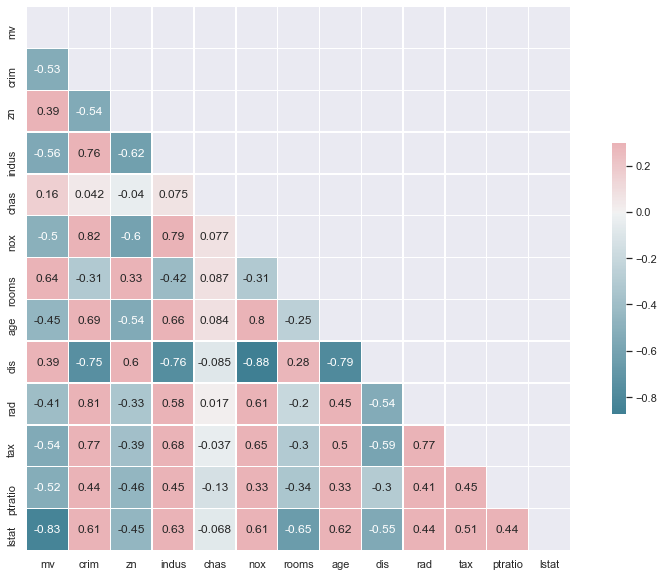

In [25]:
plt.figure(figsize=(15,10))
corr=boston_df4.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Create Dataset for Random Search

In [26]:
boston_df6=boston_df4.copy()

#### Drop Correlated Values ( correlation >= (+/-) 0.75 )

In [27]:
columns = ['rad', 
           'dis', 
           #'nox'
          ]
boston_df5 = boston_df4#.drop(columns=columns)

In [28]:
list(boston_df5.columns.values)

['mv',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat']

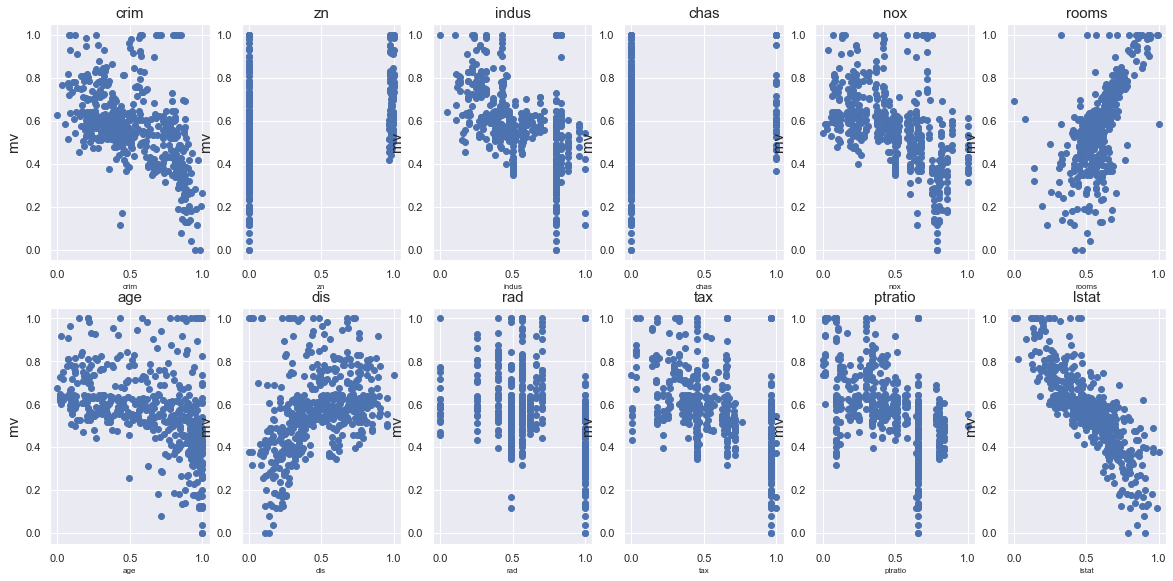

In [29]:
# Create multiple plots
features = boston_df5.drop('mv', 1).columns
target = boston_df5['mv']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(boston_df5[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('mv', fontsize=15)

The variables room and lstat look to have linear relationship with mv target variable

## Create Linear Regression Model

### Summary Statistics for Linear Regression Model - Statsmodel 

In [30]:
X = pd.DataFrame(np.c_[boston_df['crim']
,boston_df['indus']
,boston_df['rooms']
,boston_df['age']
,boston_df['tax']
,boston_df['ptratio']
,boston_df['lstat']
,boston_df['nox']
,boston_df['rad']
,boston_df['dis']])

In [31]:
Y = boston_Target['mv']

In [32]:
model=sm.OLS(Y, X)

In [33]:
results=model.fit()

In [34]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     mv   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1058.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        09:44:21   Log-Likelihood:                         -1547.0
No. Observations:                 506   AIC:                                      3114.
Df Residuals:                     496   BIC:                                      3156.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LinearRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
</div>

In [35]:
X = boston_df5[[ 'crim'
                 ,'indus'
                 ,'rooms'
                 ,'age'
                 ,'tax'
                 ,'ptratio'
                 ,'lstat'
                 , 'nox'
                 , 'rad'
                 , 'dis']]
y = boston_Target.mv

#### Split Dataset into Training and Test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

#### Review Train and Testing 

In [37]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(339, 10)
(167, 10)
(339,)
(167,)


#### Create LinearRegression Instance

In [38]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

#### Linear Regression Model Actual Vs. Predicted Price Plot

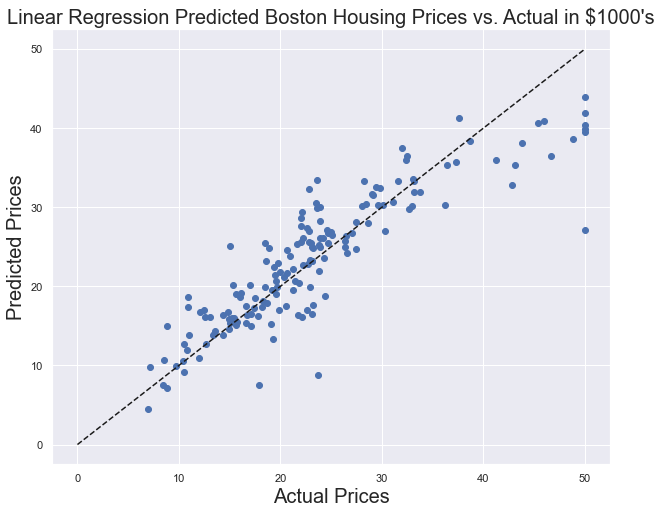

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_lrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [40]:
print("Linear Regression R_squared = ",lrm.score(X,y)) 
pred= lrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.7710534309751462
Linear Regression RMSE =  4.3891771312893235


In [41]:
print(lrm.coef_)

[  0.03426687  -3.22431073  12.16914792   2.66223977  -6.27395504
  -5.20848064 -30.38164544  -8.09458006   4.19809977 -15.04394736]


In [45]:
print(lrm.intercept_)

46.09354613596112


## Create Ridge Regression Model

<div class="alert alert-block alert-success">
    <b>Ridge Regression</b>: tends to give small but well distributed weights, because the l2 regularization cares more about driving big weight to small weights, instead of driving small weights to zeros. If you only have a few predictors, and you are confident that all of them should be really relevant for predictions, try Ridge as a good regularized linear regression method
</div>

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.Ridge</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
</div>

#### Create Ridge Regression Instance

In [42]:
rrm = Ridge()

# Fit data on to the model
rrm.fit(X_train, y_train)

# Predict
y_predicted_rrm = rrm.predict(X_test)

#### Linear Regression Model Actual Vs. Predicted Price Plot

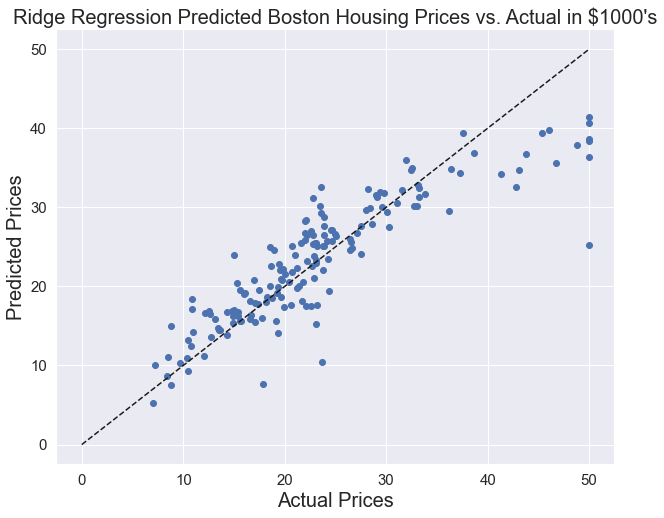

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_rrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Ridge Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [44]:
print("Ridge Regression R_squared = ",rrm.score(X,y)) 
pred= rrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Ridge Regression RMSE = ', rmse)

Ridge Regression R_squared =  0.7631123221752433
Ridge Regression RMSE =  4.4646485053910645


In [45]:
print(rrm.coef_)

[ -0.63516136  -3.41688466  12.22116841   1.78744015  -5.7735611
  -5.58208747 -26.5358906   -5.10101397   3.63927383 -11.39793652]


In [46]:
print(rrm.intercept_)

42.03506387202184


## Create Lasso Regression Model
Linear Model trained with L1 prior as regularizer (Lasso)

<div class="alert alert-block alert-success">
    <b>Lasso Regression</b>: tend to give sparse weights (most zeros), because the l1 regularization cares equally about driving down big weights to small weights, or driving small weights to zeros. If you have a lot of predictors (features), and you suspect that not all of them are that important, Lasso and ElasticNet may be really good idea to start with</div>

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.Lasso</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
</div>

In [47]:
larm = Lasso(alpha=0.001)

# Fit data on to the model
larm.fit(X_train, y_train)

# Predict
y_predicted_larm = larm.predict(X_test)

#### Lasso Regression Model Actual Vs. Predicted Price Plot

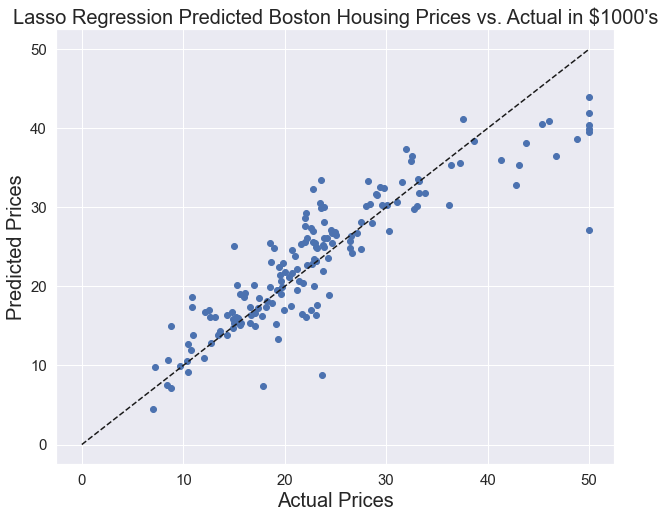

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_larm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Lasso Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [49]:
print("Lasso Regression R_squared = ",larm.score(X,y)) 
pred= larm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Lasso Regression RMSE = ', rmse)

Lasso Regression R_squared =  0.7709647436562878
Lasso Regression RMSE =  4.390027169495338


In [50]:
print(larm.coef_)

[  0.          -3.19390954  12.1466467    2.6189884   -6.2287464
  -5.19708125 -30.35694571  -7.93008645   4.13668342 -14.90254196]


In [51]:
print(larm.intercept_)

45.978102210952386


## Create ElasticNet Regression Model

<div class="alert alert-block alert-success">
    <b>ElasticNet Regression</b>: tend to give sparse weights (most zeros), because the l1 regularization cares equally about driving down big weights to small weights, or driving small weights to zeros. If you have a lot of predictors (features), and you suspect that not all of them are that important, Lasso and ElasticNet may be really good idea to start with</div>

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.ElasticNet</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
</div>

#### Create ElasticNet Regression Instance

In [52]:
enrm = ElasticNet(alpha=0.001)

# Fit data on to the model
enrm.fit(X_train, y_train)

# Predict
y_predicted_enrm = enrm.predict(X_test)

#### ElasticNet Regression Model Actual Vs. Predicted Price Plot

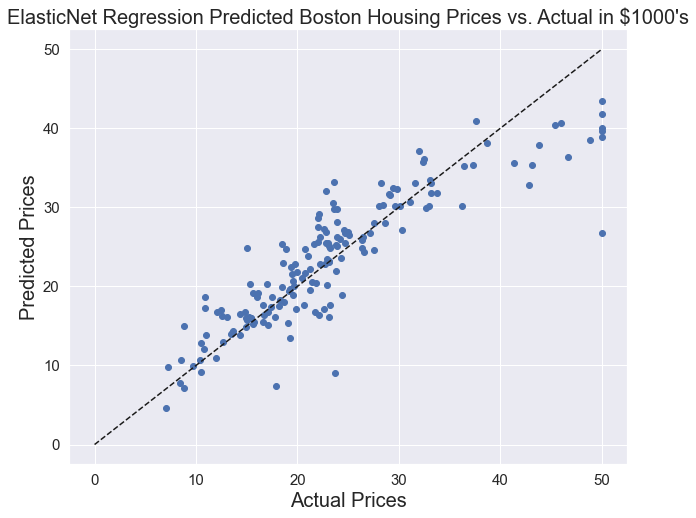

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_enrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("ElasticNet Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [54]:
print("ElasticNet Regression R_squared = ",enrm.score(X,y)) 
pred= enrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('ElasticNet Regression RMSE = ', rmse)

ElasticNet Regression R_squared =  0.7704496844858653
ElasticNet Regression RMSE =  4.394960588917638


In [55]:
print(enrm.coef_)

[ -0.09517528  -3.25038168  12.24559922   2.45521334  -6.15921814
  -5.28033017 -29.60723846  -7.32771388   4.04444386 -14.18012877]


In [56]:
print(enrm.intercept_)

45.120094600352644


#### Create copy for Model Development 

In [57]:
model_data=boston_df6.values

#### Models (Linear Regression, Ridge Regression, Lasso Regression, Elastic Net Regression)

In [58]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              Ridge(alpha = 75, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              Lasso(alpha = 0.01, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ]

### Random Search

In [59]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [60]:
cv_results_df.head(10)

,Linear_Regression,Ridge_Regression,Lasso_Regression,ElasticNet_Regression
0,0.060632,0.094503,0.067733,0.061043
1,0.064451,0.081897,0.061343,0.063664
2,0.074057,0.059136,0.044540,0.053263
3,0.075747,0.178059,0.141380,0.120119
4,0.087041,0.141569,0.117210,0.107527
5,0.095296,0.156452,0.145455,0.122087
6,0.069371,0.081946,0.080353,0.081682
7,0.207578,0.244361,0.209325,0.202495
8,0.122983,0.172372,0.160443,0.141570
9,0.120922,0.098219,0.080052,0.084045


In [75]:
X = pd.DataFrame(np.c_[boston_df['crim']
,boston_df['indus']
,boston_df['rooms']
,boston_df['age']
,boston_df['tax']
,boston_df['ptratio']
,boston_df['lstat']
,boston_df['nox']
,boston_df['rad']
,boston_df['dis']])

Y = boston_Target['mv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

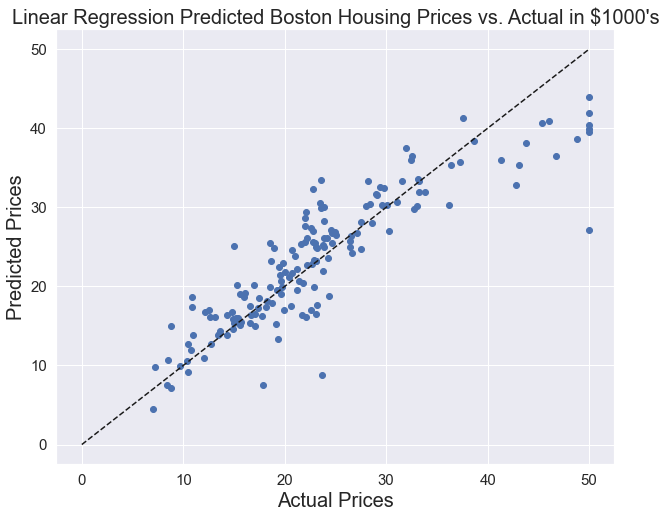

Linear Regression R_squared =  0.7710534309751462
Linear Regression RMSE =  4.3891771312893235
Linear Regression coefficient =  [  0.03426687  -3.22431073  12.16914792   2.66223977  -6.27395504
  -5.20848064 -30.38164544  -8.09458006   4.19809977 -15.04394736]
Linear Regression intercept =  46.09354613596112


In [46]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_lrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

print("Linear Regression R_squared = ",lrm.score(X,y)) 
pred= lrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Linear Regression RMSE = ', rmse)
print("Linear Regression coefficient = ", lrm.coef_)
print("Linear Regression intercept = ", lrm.intercept_)

In [77]:
print("Linear Regression R_squared = ",lrm.score(X,y)) 
pred= lrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Linear Regression RMSE = ', rmse)
print("Linear Regression coefficient = ", lrm.coef_)
print("Linear Regression intercept = ", lrm.intercept_)

Linear Regression R_squared =  0.7225969854123768
Linear Regression RMSE =  4.831384771798568
Linear Regression coefficient =  [-1.49139003e-01 -4.54001638e-02  3.45337579e+00  1.11217552e-02
 -9.82649501e-03 -1.00971768e+00 -5.86272157e-01 -1.76516022e+01
  2.49302883e-01 -1.18619046e+00]
Linear Regression intercept =  43.01745521866126


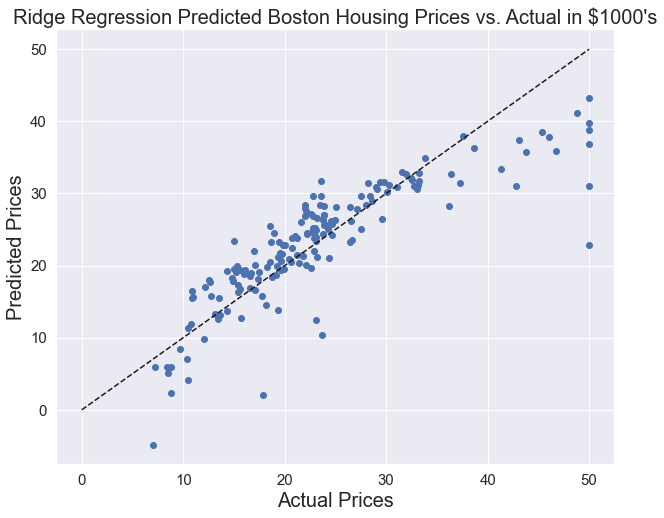

Ridge Regression R_squared =  0.7191721049378526
Ridge Regression RMSE =  4.861117965704412
Ridge Regression coefficient =  [-1.44328034e-01 -7.71220655e-02  3.50726333e+00  3.02446792e-03
 -1.03663971e-02 -9.19228230e-01 -5.98081707e-01 -8.98068461e+00
  2.26037551e-01 -1.04121351e+00]
Ridge Regression intercept =  37.13880106128509


In [78]:
rrm = Ridge()

# Fit data on to the model
rrm.fit(X_train, y_train)

# Predict
y_predicted_rrm = rrm.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_rrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Ridge Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

print("Ridge Regression R_squared = ",rrm.score(X,y)) 
pred= rrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Ridge Regression RMSE = ', rmse)
print("Ridge Regression coefficient = ", rrm.coef_)
print("Ridge Regression intercept = ", rrm.intercept_)

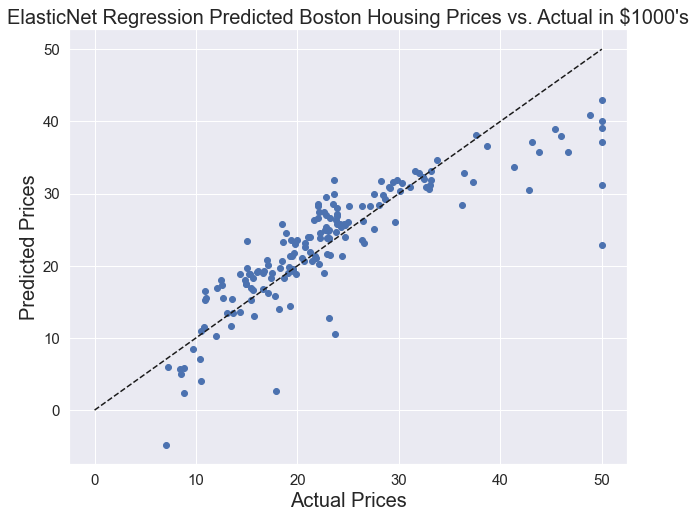

ElasticNet Regression R_squared =  0.7221538141649264
ElasticNet Regression RMSE =  4.835242473830457
ElasticNet Regression coefficient =  [-1.47669103e-01 -5.48956348e-02  3.47341182e+00  8.65269368e-03
 -9.98728705e-03 -9.82027492e-01 -5.89640263e-01 -1.50246300e+01
  2.42131753e-01 -1.14205090e+00]
ElasticNet Regression intercept =  41.20437626509201


In [79]:
enrm = ElasticNet(alpha=0.001)

# Fit data on to the model
enrm.fit(X_train, y_train)

# Predict
y_predicted_enrm = enrm.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_enrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("ElasticNet Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

print("ElasticNet Regression R_squared = ",enrm.score(X,y)) 
pred= enrm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('ElasticNet Regression RMSE = ', rmse)
print('ElasticNet Regression coefficient = ', enrm.coef_)
print('ElasticNet Regression intercept = ', enrm.intercept_)

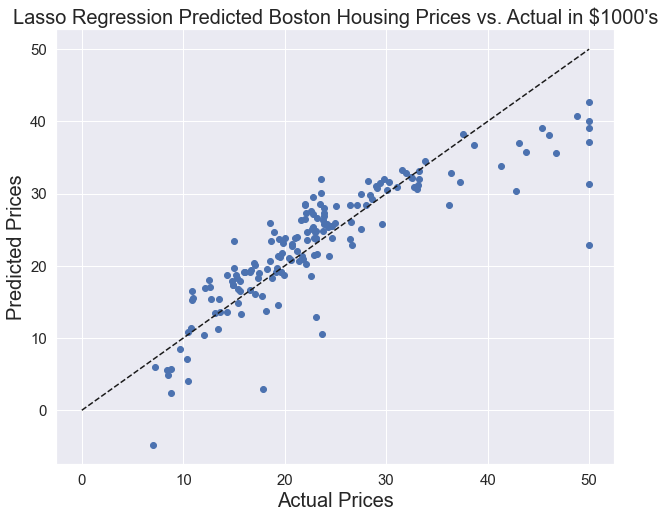

Lasso Regression R_squared =  0.7225609555758408
Lasso Regression RMSE =  4.831698518121582
Lasso Regression coefficient =  [-1.48907860e-01 -4.65421135e-02  3.45380891e+00  1.08308831e-02
 -9.84730183e-03 -1.00612628e+00 -5.86821535e-01 -1.73186133e+01
  2.48372331e-01 -1.18008432e+00]
Lasso Regression intercept =  42.79693636718534


In [80]:
larm = Lasso(alpha=0.001)

# Fit data on to the model
larm.fit(X_train, y_train)

# Predict
y_predicted_larm = larm.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_larm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Lasso Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

print("Lasso Regression R_squared = ",larm.score(X,y)) 
pred= larm.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('Lasso Regression RMSE = ', rmse)
print('Lasso Regression coefficient = ', larm.coef_)
print('Lasso Regression intercept = ', larm.intercept_)